In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import fetch_data

start_date_str = '2023-05-31'
end_date_str = '2023-05-31'
organization_id = 'hamid'
can_k3y_id = '9ed5b50e'
imu_k3y_id = '78f8031e'

Collect IMU and CAN Server Data

In [5]:
event_dict = fetch_data.get_events(can_k3y_id, organization_id, start_date_str, end_date_str)
can_df = fetch_data.get_can_data(can_k3y_id, organization_id, start_date_str, end_date_str)
imu_df = fetch_data.get_imu_data(imu_k3y_id, organization_id, start_date_str, end_date_str)

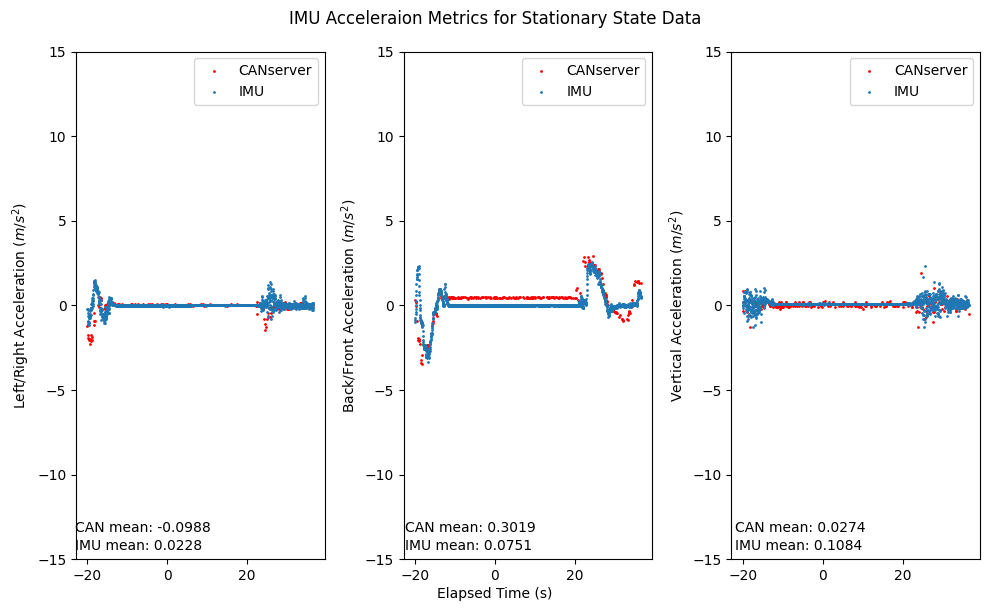

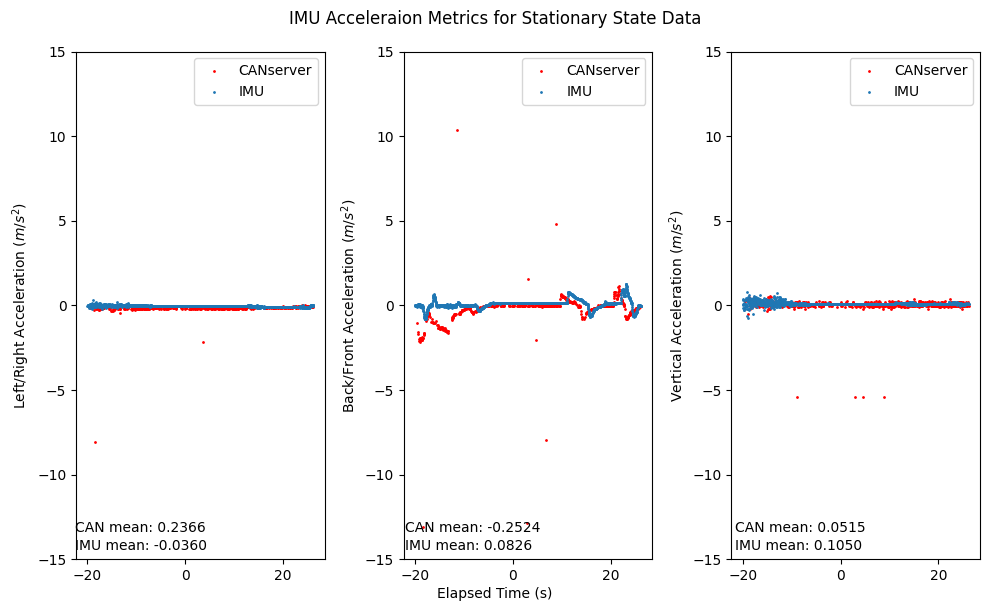

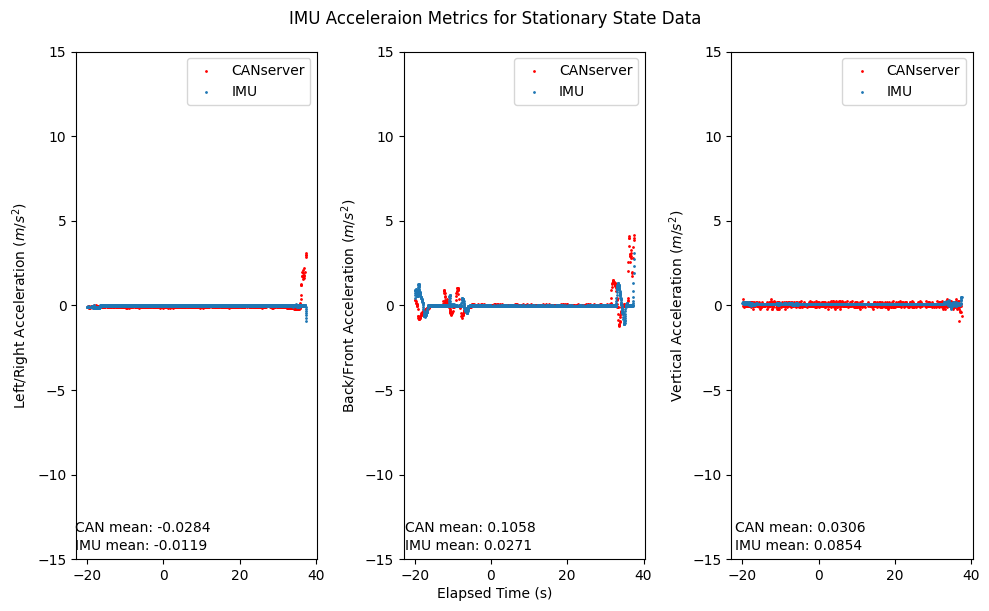

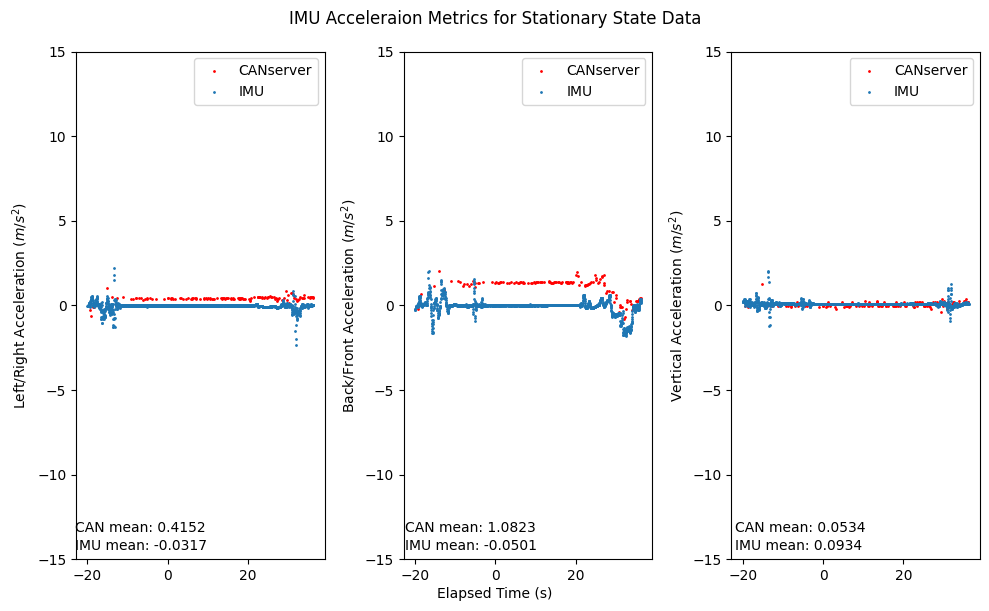

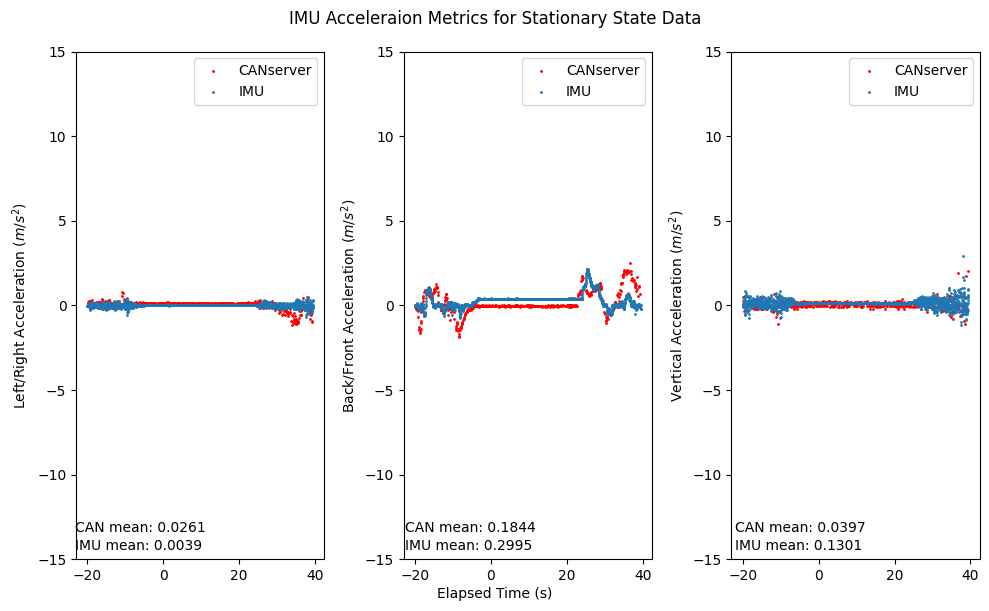

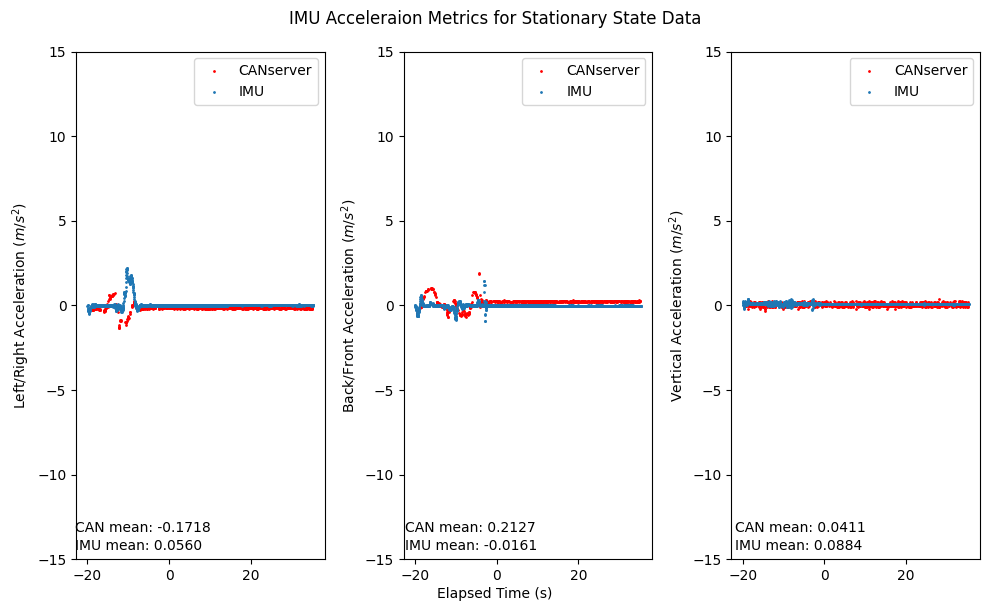

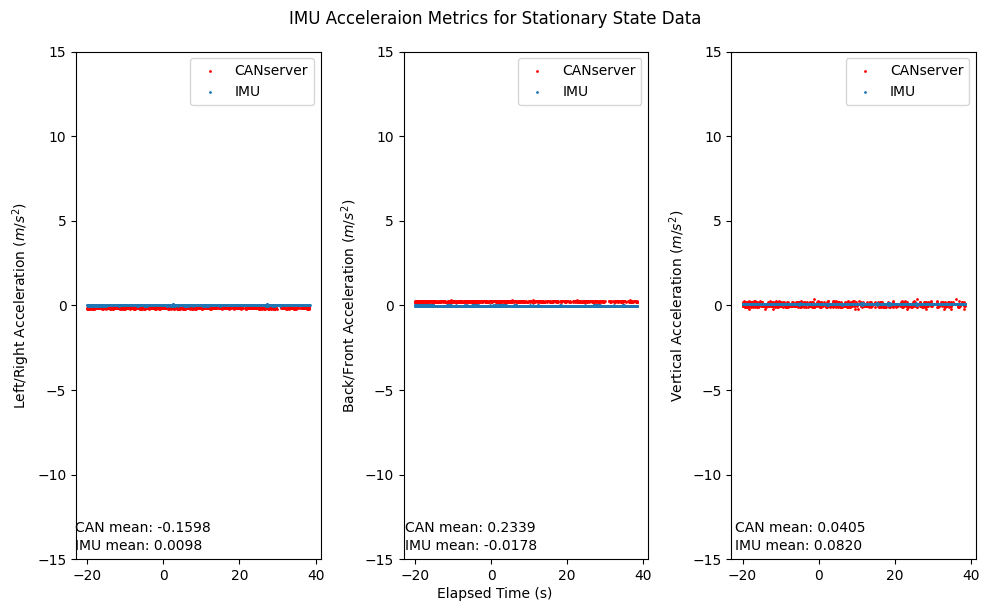

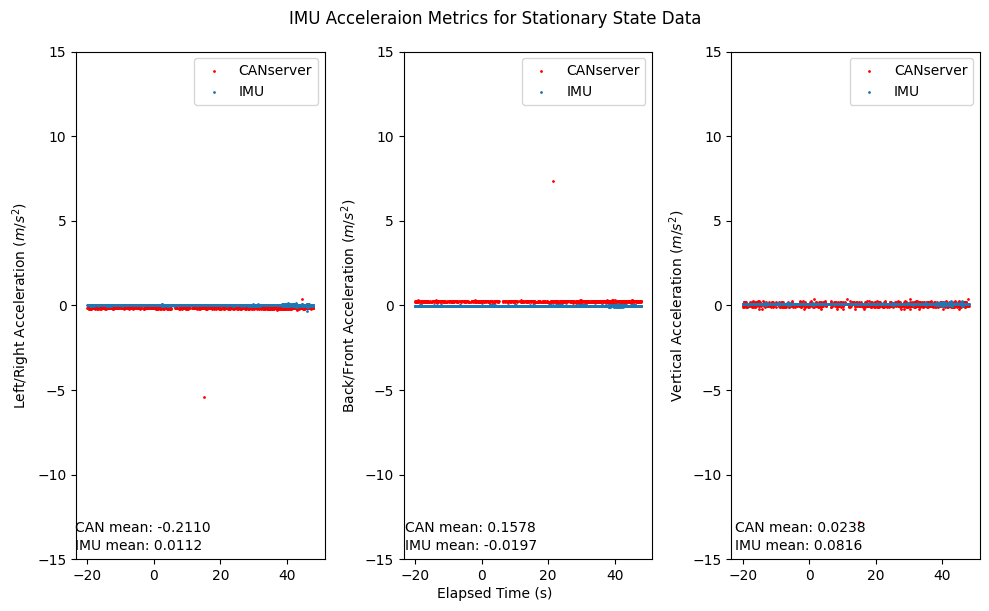

In [9]:
# plotting the IMU stationary state accelerations
edge_time = 20

for state_num in range(len(event_dict['stationary_state'])):
    ss_start_time = event_dict['stationary_state'][state_num]['start']
    ss_end_time = event_dict['stationary_state'][state_num]['end']
    ss_motion = imu_df[(imu_df['correct_timestamp'] >= ss_start_time - edge_time) 
                       & (imu_df['correct_timestamp'] <= ss_end_time + edge_time)]
    can_motion = can_df[(can_df['timestamp'] >= ss_start_time - edge_time) 
                        & (can_df['timestamp'] <= ss_end_time + edge_time)]

    if (len(ss_motion) != 0):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

        fig.set_size_inches(10,6)

        lr_mean = ss_motion['lr_acc(m/s^2)'].mean()
        bf_mean = ss_motion['bf_acc(m/s^2)'].mean()
        vert_mean = ss_motion['vert_acc(m/s^2)'].mean()
        lr_can_mean = can_motion['lr_acc'].mean()
        bf_can_mean = can_motion['bf_acc'].mean()
        vert_can_mean = can_motion['vert_acc'].mean()

        ax1.scatter(x=can_motion['timestamp'] - ss_start_time, y=can_motion['lr_acc'], s=1, color='red', label='CANserver')
        ax1.scatter(x=ss_motion['correct_timestamp'] - ss_start_time, y=ss_motion['lr_acc(m/s^2)'], s=1, label='IMU')
        ax1.set_ylim(-15,15)

        ax2.scatter(x=can_motion['timestamp'] - ss_start_time, y=can_motion['bf_acc'], s=1, color='red', label='CANserver')
        ax2.scatter(x=ss_motion['correct_timestamp'] - ss_start_time, y=ss_motion['bf_acc(m/s^2)'], s=1, label='IMU')
        ax2.set_ylim(-15,15)

        ax3.scatter(x=can_motion['timestamp'] - ss_start_time, y=can_motion['vert_acc'], s=1, color='red', label='CANserver')
        ax3.scatter(x=ss_motion['correct_timestamp'] - ss_start_time, y=ss_motion['vert_acc(m/s^2)'], s=1, label='IMU')
        ax3.set_ylim(-15,15)

        fig.suptitle("IMU Acceleraion Metrics for Stationary State Data")
        fig.text(0.5, 0.0, 'Elapsed Time (s)', ha='center')

        fig.text(0.08,0.08,f'IMU mean: {lr_mean:.4f}')
        fig.text(0.41,0.08,f'IMU mean: {bf_mean:.4f}')
        fig.text(0.74,0.08,f'IMU mean: {vert_mean:.4f}')
        fig.text(0.08,0.11,f'CAN mean: {lr_can_mean:.4f}')
        fig.text(0.41,0.11,f'CAN mean: {bf_can_mean:.4f}')
        fig.text(0.74,0.11,f'CAN mean: {vert_can_mean:.4f}')

        ax1.set_ylabel("Left/Right Acceleration ($m/s^2$)")
        ax2.set_ylabel("Back/Front Acceleration ($m/s^2$)")
        ax3.set_ylabel("Vertical Acceleration ($m/s^2$)")

        ax1.legend()
        ax2.legend()
        ax3.legend()
        plt.tight_layout()
        plt.show()

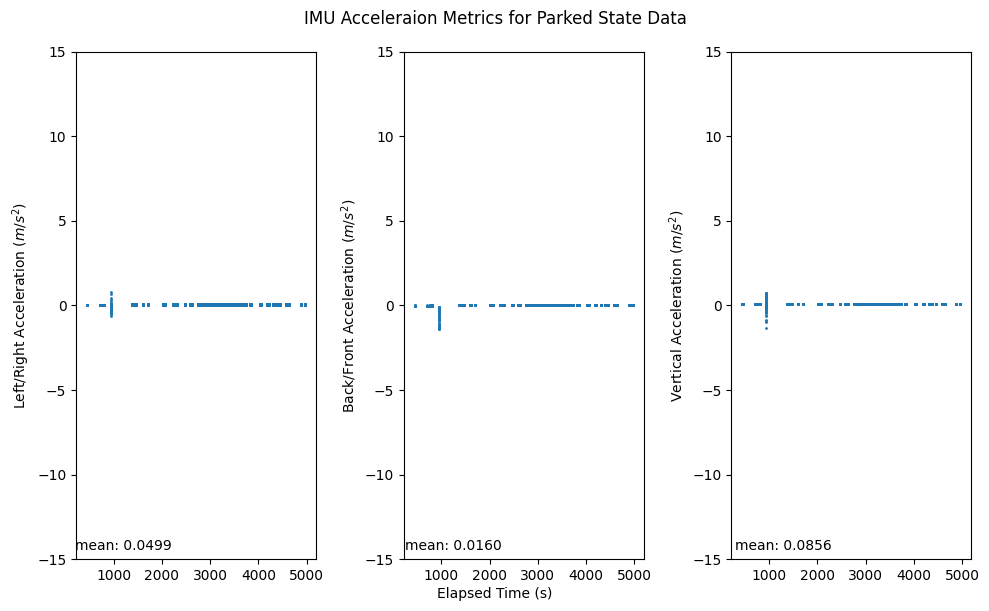

Vertical acceleration:
max: 0.7274162571462669
min: -1.3415582220052755


In [11]:
# plot the imu parked state data stitched together

pk_states= []
for state_num in range(len(event_dict['parked_state'])):
    pk_start_time = event_dict['parked_state'][state_num]['timestamp'][0]
    pk_end_time = event_dict['parked_state'][state_num]['timestamp'][1]
    pk_states.append(imu_df[(imu_df['timestamp(epoch in sec)'] >= pk_start_time) 
                            & (imu_df['timestamp(epoch in sec)'] <= pk_end_time)])
pk_motion = pd.concat(pk_states, ignore_index=True)
pk_start_time = event_dict['parked_state'][0]['timestamp'][0]
pk_motion = pk_motion[pk_motion['timestamp(epoch in sec)'] <= pk_start_time + 5000]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(10,6)

lr_mean = pk_motion['lr_acc(m/s^2)'].mean()
bf_mean = pk_motion['bf_acc(m/s^2)'].mean()
vert_mean = pk_motion['vert_acc(m/s^2)'].mean()
lr_max = pk_motion['lr_acc(m/s^2)'].max()
bf_max = pk_motion['bf_acc(m/s^2)'].max()
vert_max = pk_motion['vert_acc(m/s^2)'].max()
lr_min = pk_motion['lr_acc(m/s^2)'].min()
bf_min = pk_motion['bf_acc(m/s^2)'].min()
vert_min = pk_motion['vert_acc(m/s^2)'].min()

pk_start_time = event_dict['parked_state'][0]['timestamp'][0]
ax1.scatter(x=pk_motion['timestamp(epoch in sec)'] - pk_start_time, y=pk_motion['lr_acc(m/s^2)'], s=1, label='IMU')
ax1.set_ylim(-15,15)

ax2.scatter(x=pk_motion['timestamp(epoch in sec)'] - pk_start_time, y=pk_motion['bf_acc(m/s^2)'], s=1, label='IMU')
ax2.set_ylim(-15,15)

ax3.scatter(x=pk_motion['timestamp(epoch in sec)'] - pk_start_time, y=pk_motion['vert_acc(m/s^2)'], s=1, label='IMU')
ax3.set_ylim(-15,15)

fig.text(0.08,0.08,f'mean: {lr_mean:.4f}')
fig.text(0.41,0.08,f'mean: {bf_mean:.4f}')
fig.text(0.74,0.08,f'mean: {vert_mean:.4f}')

fig.suptitle("IMU Acceleraion Metrics for Parked State Data")
fig.text(0.5, 0.0, 'Elapsed Time (s)', ha='center')

ax1.set_ylabel("Left/Right Acceleration ($m/s^2$)")
ax2.set_ylabel("Back/Front Acceleration ($m/s^2$)")
ax3.set_ylabel("Vertical Acceleration ($m/s^2$)")

plt.tight_layout()
plt.show()

print('Vertical acceleration:')
print(f'max: {vert_max}')
print(f'min: {vert_min}')